Lab_3 var_3-1

Устанавливаем DeepFace

In [ ]:
pip install DeepFace


Секция Import

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from time import time

Монтируем Google диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Data/Lab3"

ECSMyRHUkbU.jpg		 VID_20211205_192246.mp4  wZddRRRC9nw.jpg
VID_20211205_191210.mp4  VID_20211205_200434.mp4


Считываем тестовые картинки

In [ ]:
frame_1 = cv.imread("/content/drive/My Drive/Colab Data/Lab3/ECSMyRHUkbU.jpg")
frame_1  = cv.cvtColor(frame_1, cv.COLOR_BGR2RGB)
frame_2 = cv.imread("/content/drive/My Drive/Colab Data/Lab3/wZddRRRC9nw.jpg")
frame_2  = cv.cvtColor(frame_2, cv.COLOR_BGR2RGB)

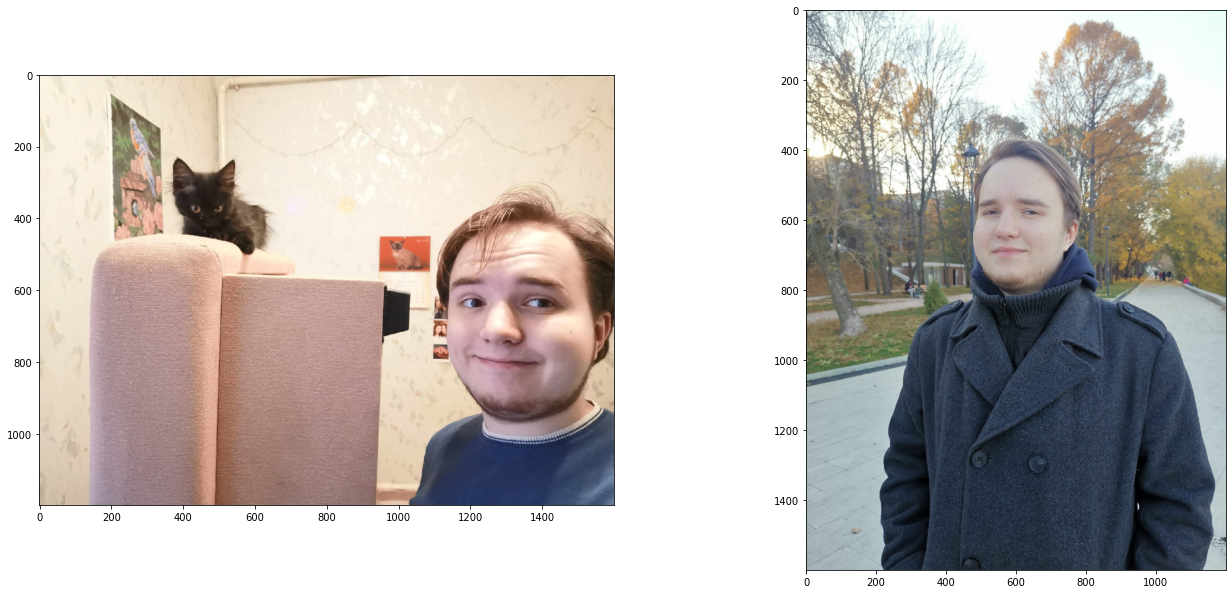

In [ ]:
frame_list = [frame_1, frame_2]
plt.figure(figsize=[35, 35])
for i in range(0,2):
  plt.subplot(3, 3, i+1)
  plt.imshow(frame_list[i])
plt.show()

Пробуем использовать верификацию 

In [ ]:
from deepface import DeepFace

In [ ]:
feature_vector = DeepFace.verify(frame_1, frame_2, model_name = "VGG-Face", detector_backend='dlib')


In [ ]:
print(feature_vector)

{'verified': True, 'distance': 0.156937284923803, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}


Считываем тестовое видео

In [ ]:
cap = cv.VideoCapture("/content/drive/My Drive/Colab Data/Lab3/VID_20211205_200434.mp4")

while(cap.isOpened()):
    start = time()

    # Read an image
    ret, frame = cap.read()

    if ret:

        feature_vector = DeepFace.verify(frame_1, frame, model_name = "VGG-Face", detector_backend='dlib', enforce_detection = False)
        print(feature_vector)
    
        end = time()
        fps = 1 / (end - start)

        frame =  cv.putText(frame, 'fps:{:.2f}'.format(fps), (5, 25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
        frame =  cv.putText(frame, 'Is that me?:' + str(feature_vector['verified']), (5, 55), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
        
        cv2_imshow(frame)